**Introduction to Machine Learning: Linear Regression**   
Topics Covered:   
1. Loss Function
1. One Dimensional Linear Regression
1. Multivariate Linear Regression
1. Feature Augmentation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

**Feature Vector**   
Presented with a collection of labeled examples $X$ and $y$. Where $X$ is a feature vector of the form. Where $N$ are the observations and $D$ are the features. $$X = \begin{matrix}
x_{1,1} & x_{1,2} & ... & x_{1,D}\\
x_{2,1} & x_{2,2} & ... & x_{2,D}\\
... & ... & ... & ...\\
x_{N,1} & x_{N,2} & ... & x_{N,D}
\end{matrix}$$   
A single observation within $N$ is denoted as $i = 1, ..., N$. A single feature within $D$ is denoted $j = 1, ..., D$. A single point in the feature matrix is denoted as $x_{i,j}$.   
   
   **Target Vector**   
The target vector is y and it takes the form: $y = y_{i}, ..., N$

**Boston Housing Market Example**   
Scikit Learn comes with a selection of example datasets. Data from the Boston housing market is loaded to provide an example. For simplification only two feature vectors will be kept. The dataset is described as:   
1. Observations (N = 506):   
How many rows are in the dataframe.   
2. Features (D = 2):   
**RM** - Average number of rooms per dwelling   
**LSTAT** - % lower status of the population   
3. Target Variable (y):   
**MEDV** - Median value of owner-occupied homes in $1000's.

In [2]:
boston = load_boston()
# feature vector
ft = pd.DataFrame(boston['data'], columns=boston['feature_names'])
# only keep two columns of feature vector, simplify problem
ft = ft[['RM', 'LSTAT']]
# target vector, median value of housing area
tg = pd.DataFrame(boston['target'], columns=['MEDV'])
# combine feature and target vector to make dataframe
df = pd.concat([ft, tg], axis=1, sort=False)
df.head(3)

,RM,LSTAT,MEDV
0,6.575,4.98,24.0
1,6.421,9.14,21.6
2,7.185,4.03,34.7


**Visually Inspect Data**

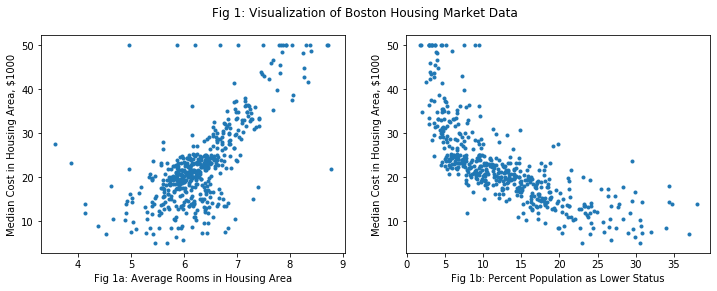

In [3]:
# generate overall figure and axes subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
# generate first graph
axs[0].scatter(x='RM', y='MEDV', data=df, marker='.')
axs[0].set_ylabel('Median Cost in Housing Area, $1000')
axs[0].set_xlabel('Fig 1a: Average Rooms in Housing Area')
# generate second graph
axs[1].scatter(x='LSTAT', y='MEDV', data=df, marker='.')
axs[1].set_ylabel('Median Cost in Housing Area, $1000')
axs[1].set_xlabel('Fig 1b: Percent Population as Lower Status')
# set overall title and show plot
fig.suptitle('Fig 1: Visualization of Boston Housing Market Data')
plt.show()

**Theory Continued**   
The goal of linear regression is to build an estimate function that takes the form. $$y_{W}(X) = w_{0} + w_{1}x_{1} + ... + w_{D}x_{D}$$ 
$X$ is a vector of features of the form $X = x_{1}, x_{2}, ... x_{D}$. $W$ is a D-dimensional vector of parameters $W = w_{0}, w_{1}, w_{2}, ... w_{D}$. The parameter $w_{0}$ is commonly referred to as the intercept. To make the math easier to apply a feature vector is added to the data equal to one denoted by $x_{0} = 1$. $y_{w}(X)$ is a function attempting to estimate the values of the data with parameters $W$.   

**Cost and Loss Function**   
The optimal values of $W$ are found from minimizing the cost function. A common cost function to minimize in linear regression is: $$l = \frac{1}{N}\sum_{i=1}^{N}(y_{i}-(Wx_{i}))^{2}$$ The premise is to minimize the squared difference between the actual target, $y_{i}$, and estimated target, $Wx_{i}$. The above expression inside the summation is referred to as the *squared error loss*.   

**Single Feature Linear Regression**   
If a dataset only has one feature, then equations for $w_{1}$ and $w_{0}$ can explicity be solved for. Without going into detail, derivatives of the cost function with regards to $w_{1}$ and $w_{0}$ can be taken. Setting the equations to zero and solving produces two equation with two unknowns. The resulting functions from the derivation are below.
$$w_{1} = \frac{covariance(x,y)}{variance(x)}$$
$$w_{0} = mean(y) - w_{1}*mean(x)$$ These equations will be applied to the average rooms feature shown in figure 1a.

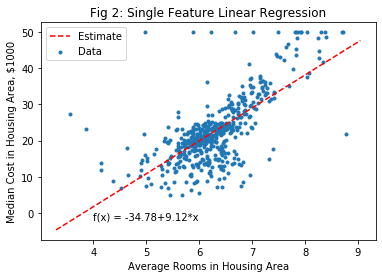

In [4]:
# estimate single feature parameters
w1 = np.cov(df['RM'], df['MEDV'])[0,1]/np.var(df['RM'])
w0 = np.mean(df['MEDV'])-w1*np.mean(df['RM'])

# apply estimated function
rmin, rmax = axs[0].set_xlim() # room max and min from previous graph
x_in = np.linspace(rmin, rmax, 2)
f_w = w1*x_in+w0

# plot estimated function and data
plt.scatter(x='RM', y='MEDV', data=df, label='Data', marker='.')
plt.plot(x_in, f_w, label='Estimate', ls='--', color='r')
plt.xlabel('Average Rooms in Housing Area')
plt.ylabel('Median Cost in Housing Area, $1000')
plt.title('Fig 2: Single Feature Linear Regression')
plt.legend()
plt.annotate('f(x) = {:.2f}+{:.2f}*x'.format(w0, w1), xy=(4, -2), color='k')
plt.show()

**Multivariate Regression**   
If multiple feature vectors exist, such as in our housing example, the coefficients can still be explicitly solved for. To accomplish this requires matrix math. Andrew Ng's video shown in references does an excellent job of explaining some of the underlining math. 

Intercept, w0: -3.84
RM        | Reg. Coef. is: 5.47
LSTAT     | Reg. Coef. is: -0.63
R-Squared: 0.574


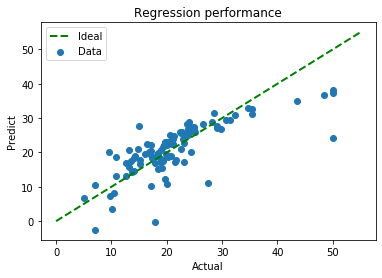

In [51]:
ft = ['RM', 'LSTAT']
tg = ['MEDV']

X = df[ft].values
y = df[tg].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

reg = LinearRegression()
reg.fit(X_train, y_train)

# for some reason sklearn coef was returning list inside a list
flat_intr = reg.intercept_[0]
print('Intercept, w0: {:.2f}'.format(flat_intr))

# for some reason sklearn coef was returning list inside a list
flat_coef = reg.coef_[0]

coef_dict = dict(zip(list(df[ft].columns.values), flat_coef))

for key, val in coef_dict.items():
    print('{:10}| Reg. Coef. is: {:.2f}'.format(key, val))

y_pred = reg.predict(X_test)

print('R-Squared: {:.3f}'.format(reg.score(X_test, y_test)))
    
# make a dataframe to easily plot the results
#dfR = pd.DataFrame({'actual': y_test, 'predict': y_pred})
plt.scatter(x=y_test, y=y_pred, label='Data')
plt.plot([0, 55], [0, 55], 'g--', linewidth=2, label='Ideal')
plt.title('Regression performance')
plt.xlabel('Actual')
plt.ylabel('Predict')
plt.legend()

plt.show()

**Feature Augmentation**   
The overall r squared fit of the data is 0.574. This isn't great. We are going to try to see if this can be improved with feature augmentation. When graphing data you should keep an eye out for variables that maybe represented with a nonlinear relationship. For example: LSTAT and MEDV. The plotting module SEABORN has a great plot for early investigation of linear regression called regplot. It attempts to fit the data and graphs a linear regression line on top. An optional arguement, called logx plots the regression line in a log scale.

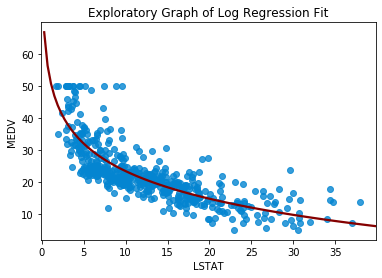

In [43]:
sns.regplot(
    x = 'LSTAT', 
    y = 'MEDV', 
    data=df,
    ci=None,
    logx=True,
    scatter_kws={'color': 'xkcd:cerulean'}, # using xkcd color codes, https://xkcd.com/color/rgb/
    line_kws={'color': '#840000'} # using hex color codes
)

plt.title('Exploratory Graph of Log Regression Fit')

plt.show()

**Natural Log of LSTAT**   
Another dataframe will be generated that uses the log of the LSTAT data. Linear regression will be fitted to understand the data.

Intercept, w0: 20.26
RM        | Reg. Coef. is: 3.94
log_lstat | Reg. Coef. is: -9.50
R-Squared: 0.675


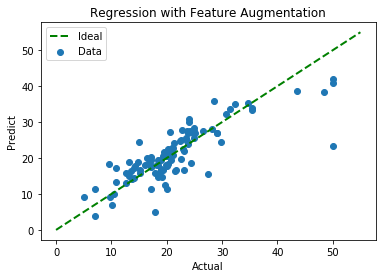

In [50]:
df2 = df.copy()

df2['log_lstat'] = np.log(df2['LSTAT'])

ft2 = ['RM', 'log_lstat']
tg2 = ['MEDV']

X2 = df2[ft2].values
y2 = df2[tg2].values

X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, test_size=0.2, random_state=42)

reg2 = LinearRegression()
reg2.fit(X2_train, y2_train)

# for some reason sklearn coef was returning list inside a list
flat_intr2 = reg2.intercept_[0]
print('Intercept, w0: {:.2f}'.format(flat_intr2))

# for some reason sklearn coef was returning list inside a list
flat_coef2 = reg2.coef_[0]

coef_dict2 = dict(zip(list(df2[ft2].columns.values), flat_coef2))

for key, val in coef_dict2.items():
    print('{:10}| Reg. Coef. is: {:.2f}'.format(key, val))

y2_pred = reg2.predict(X2_test)

print('R-Squared: {:.3f}'.format(reg2.score(X2_test, y2_test)))
    
# make a dataframe to easily plot the results
#dfR = pd.DataFrame({'actual': y_test, 'predict': y_pred})
plt.scatter(x=y2_test, y=y2_pred, label='Data')
plt.plot([0, 55], [0, 55], 'g--', linewidth=2, label='Ideal')
plt.title('Regression with Feature Augmentation')
plt.xlabel('Actual')
plt.ylabel('Predict')
plt.legend()

plt.show()

**Summary**   
The following provided a brief overview of linear regression. Linear regression is a great machine learning algorithm to start with, as it is easily understood. Initially linear regression was created using just one feature and simple algerbra. After multivariate regression was introduced on two features. From early inspection of the data the LSTAT feature appeared to have a natural log shape. Feature augmentation was performed by taking the natural log of LSTAT. With feature augmentation the regression's R squared fit increased from 0.574 to 0.675. Feature augmentation opportunities should also be used to help increase performance.

**References**      
Linear Regression, Andrew Ng: [YouTube](https://www.youtube.com/watch?v=Q4GNLhRtZNc)